# CafGa (**C**ustom **a**ssignments **f**or **G**roup **a**ttribution) DEMO

This demo is intended to get an overview of how the CafGa library works. To run it please follow the instructions in 'Demo Instructions.md'. 


## Initialisation
To begin using CafGa, we first instantiate a CafGa object. This is where we pass the model we would like to generate explanations for. In this case we use the predefined ChatGPT model. 


In [6]:
%load_ext autoreload
%autoreload 2
%env ANYWIDGET_HMR=1

from cafga import CafGa

cafga = CafGa(model="chatgpt")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: ANYWIDGET_HMR=1


## Defining The Task

Next we define the task for the model to solve. The template will act as a wrapper around the input that describes the task. The template will not be perturbed. Only the input string will be perturbed and each perturbation will be pasted into the `{input}` field. 

Finally, we define the target answer against which the model's responses will be matched to the correct answer which is 'e'. 

In [7]:
# Example Task
input = """I'm excited to use CafGa, but I'm not sure about it's usage."""
template = """For the text snippet below answer whether it has positive or negative sentiment. 
Your answer should be only one word: 'posiitive' or 'negative'. Text snippet:\n
{input}
"""
target_answer = "positive"

## Editing the Assignments

To define the groups in the input over which you would like to get attributions you can use the edit widget to define the assignment of input segments to groups. 

In [8]:
cafga.edit_assignments(input, "word")

EditWidget(inputSegments=["I'm ", 'excited ', 'to ', 'use ', 'CafGa, ', 'but ', "I'm ", 'not ', 'sure ', 'abou…

TraitError: The 'sampleName' trait of an EditWidget instance expected a unicode string, not the NoneType None.

Run the cell below to see the effect of your edits once you have hit confirm.

In [12]:
# When you press confirm in the widget above you can see the updated input below
edited_input = cafga.get_edited_input()
print(edited_input)

Sample: example
With input Segments: ["I'm ", 'excited ', 'to ', 'use ', 'CafGa, ', 'but ', "I'm ", 'not ', 'sure ', 'about ', "it's ", 'usage.']
Assigned as: [0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2]
To be evaluated with: deletion


## Getting the explanation

Given the input segments, template, target answer and assingments from above, we now want to get an explanation using CafGa. Since we have already defined the model above, all that's left to do is instantiate the scalarizer.
The scalarizer describes how the model's string output is converted to a scalar value.
CafGa supports multi-dimensional output of the scalarizer allowing you to get separate attributions for each scalarizer. 
In this case, we are looking for the output to equal or contain the target answer.

In [13]:
scalarizer = [("EQUAL", target_answer), ("CONTAIN", target_answer)]
explanation = cafga.explain(
    segmented_input=edited_input.input_segments,
    custom_assignments=edited_input.group_assignments,
    scalarizer=scalarizer,
    template=template,
)

## Visualizing the Explanation

Finally, we would like to visualize the explanation. Since we used a two-dimensional scalarizer we defacto got two explanations. Set the scalarizer_index to the index of the scalarizer for which you would like to see the explanation.

In [14]:
scalarizer_index = 0
cafga.display_explanation(
    input_segments=edited_input.input_segments,
    group_assignments=edited_input.group_assignments,
    attributions=explanation.attributions[scalarizer_index],
    sample_name=edited_input.sample_name,
)

DisplayWidget(assignments=[0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2], attributions=[np.float64(0.4999999999999999), …

## Getting the Evaluation

Now we evaluate the explanation we just received. To this end we call cafga.evaluate on the explained_input we just got and provide the evaluation parameters. This function will run the evaluation for each dimension of the scalarizer. 

In [16]:
evaluation = cafga.evaluate(
    explanation,
    scalarizer=scalarizer,
    direction=edited_input.direction,
)

## Visualizing the Evaluation

We now display the perturbation curve. As we again have multiple evaluations (one for each dimension of the scalarizer) we choose which evaluation to visualize by indicating the scalarizer_index.


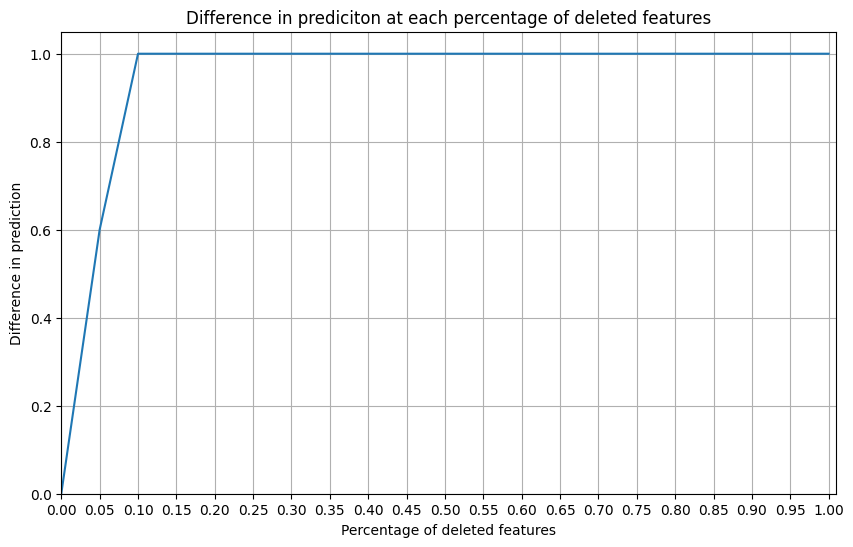

In [17]:
cafga.visualize_evaluation([evaluation], scalarizer_index=scalarizer_index)